# Machine Learning for Molecules

In [ ]:
%tensorflow_version 1.x
!curl -Lo deepchem_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import deepchem_installer
%time deepchem_installer.install(version='2.3.0')

TensorFlow 1.x selected.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3477  100  3477    0     0  23335      0 --:--:-- --:--:-- --:--:-- 23335


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing deepchem
done
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



deepchem-2.3.0 installation finished!


CPU times: user 3.31 s, sys: 794 ms, total: 4.11 s
Wall time: 2min 20s


In [ ]:
smiles = ['C1CCCCC1','01CC0CC1'] # Cyclohexane and dioxane

In [ ]:
from rdkit import Chem
mols = [Chem.MolFromSmiles(smile) for smile in smiles]
mols

[<rdkit.Chem.rdchem.Mol at 0x7f3da1d4a6c0>, None]

In [ ]:
import deepchem as dc
feat = dc.feat.CircularFingerprint(size = 1024)
feat

In [ ]:
arr = feat.featurize(mols)
arr

array([<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x7f3da1c348f0>,
       array([], dtype=float64)], dtype=object)

In [ ]:
# Here we have used the ECFP4 algorithm ehich allows sub fragments to have a radius of two bonds around teh central atom

# ECFPs do have one important disadvantage: the fingerprint encodes a large amount
# of information about the molecule, but some information does get lost. It is possible
# for two different molecules to have identical fingerprints, and given a fingerprint, it is
# impossible to uniquely determine what molecule it came from.

## Molecular Descriptors

In [ ]:
feat = dc.feat.RDKitDescriptors()
feat

In [ ]:
arr = feat.featurize(mols)
arr

array([list([1.5, 1.5, 1.5, 1.5, 84.162, 72.06599999999999, 84.093900384, 36, 0, -0.0533059727891157, -0.0533059727891157, 0.0533059727891157, 0.0533059727891157, 2.0, 15.509775004326936, 4.242640687119286, 4.242640687119285, 4.242640687119285, 3.0, 2.9999999999999996, 2.9999999999999996, 2.121320343559642, 2.121320343559642, 1.4999999999999996, 1.4999999999999996, 1.0606601717798207, 1.0606601717798207, 0.0, 34.3994618804395, 4.166666666666667, 2.2222222222222223, 1.0, 39.55813044628337, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.524929737556064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.524929737556064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.524929737556064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.524929737556064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 1.0, 6, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2.3406000000000002, 27.701999999999984]),
       array([], dtype=float64)], dtype=object)

## Training a model to predict solubility

In [ ]:
#delaney dataset is used here for predicting solubility and GraphCOnv is used as Convolution
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /tmp/delaney-processed.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
TIMING: featurizing shard 0 took 3.019 s
TIMING: dataset construction took 3.386 s
Loading dataset from disk.
TIMING: dataset construction took 0.527 s
Loading dataset from disk.
TIMING: dataset construction took 0.153 s
Loading dataset from disk.
TIMING: dataset construction took 0.147 s
Loading dataset from disk.
TIMING: dataset construction took 0.310 s
Loading dataset from disk.
TIMING: dataset construction took 0.043 s
Loading dataset from disk.
TIMING: dataset construction took 0.046 s
Loading dataset from disk.


In [ ]:
train, valid, test = datasets 

In [ ]:
tasks

['measured log solubility in mols per litre']

In [ ]:
train

In [ ]:
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)
model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




GraphConvModel(batch_size=100, dense_layer_size=128, dropout=[0.2, 0.2, 0.2],
               graph_conv_layers=[64, 64], mode='regression', n_classes=2,
               n_tasks=1, number_atom_features=75, uncertainty=False)

In [ ]:
model.fit(train, nb_epoch=100)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


0.0

In [ ]:
# Evaluation of the model
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print(model.evaluate(train, [metric], transformers))
print(model.evaluate(test, [metric], transformers))

computed_metrics: [0.9528206450461817]
{'pearson_r2_score': 0.9528206450461817}
computed_metrics: [0.8434016567162808]
{'pearson_r2_score': 0.8434016567162808}


In [ ]:
# predictions
smiles = ['COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C',
 'CCOC(=O)CC',
 'CSc1nc(NC(C)C)nc(NC(C)C)n1',
 'CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1',
 'Cc1cc2ccccc2cc1C']

In [ ]:
mols = [Chem.MolFromSmiles(smile) for smile in smiles]
mols

In [ ]:
featz = dc.feat.ConvMolFeaturizer()
featz

In [ ]:
x= featz.featurize(mols)

In [ ]:
x

array([<deepchem.feat.mol_graphs.ConvMol object at 0x7f3da16d3518>,
      dtype=object)

In [ ]:
predictions = model.predict_on_batch(x)

In [ ]:
predictions

array([[-0.5466631 ],
       [ 1.2281338 ],
       [-0.28032634],
       [-0.0825552 ],
       [-0.7860934 ]], dtype=float32)

In [ ]:
for m,s in zip(smiles, predictions):
    print()
    print('Molecule:', m)
    print('Predicted solubility:', s)


Molecule: COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C
Predicted solubility: [-0.5466631]

Molecule: CCOC(=O)CC
Predicted solubility: [1.2281338]

Molecule: CSc1nc(NC(C)C)nc(NC(C)C)n1
Predicted solubility: [-0.28032634]

Molecule: CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1
Predicted solubility: [-0.0825552]

Molecule: Cc1cc2ccccc2cc1C
Predicted solubility: [-0.7860934]


## Displaying the Molecules

In [ ]:
from rdkit.Chem.Draw import MolsToGridImage

smiles_list =['CCCCC', 'CCOCC', 'CCNCC', 'CCSCC']
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

### Molecules matching the SMARTS Expression "CCC"

In [ ]:
query = Chem.MolFromSmarts('CCC')
query

In [ ]:
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
match_list

[(0, 1, 2), (), (), ()]

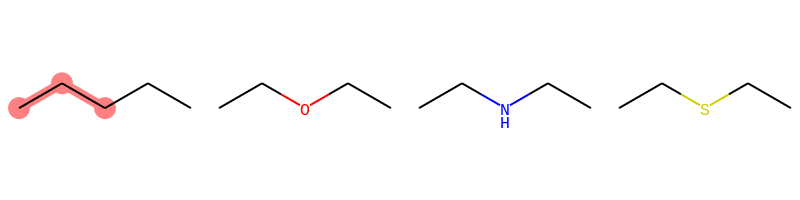

In [ ]:
MolsToGridImage(mols=mol_list, molsPerRow=4, highlightAtomLists=match_list)

### Molecules matching the SMARTS Expression 'C*C'

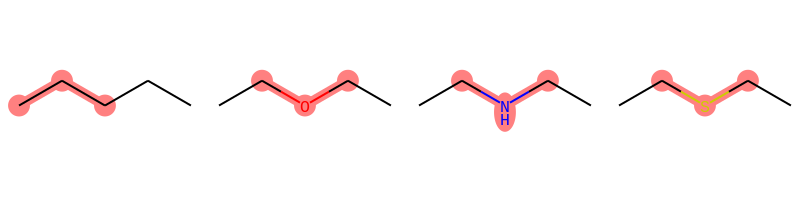

In [ ]:
query = Chem.MolFromSmarts('C*C')
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4, highlightAtomLists=match_list)

### Molecules matching the SMARTS Expression 'C[C,N,O]C'

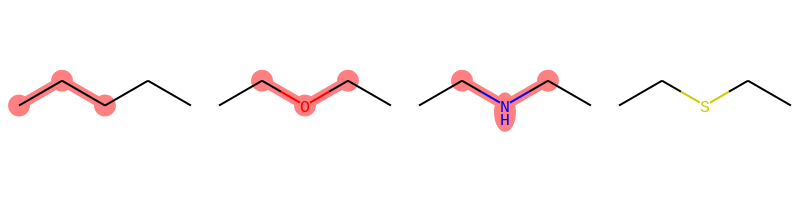

In [ ]:
query = Chem.MolFromSmarts('C[C,N,O]C')
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
MolsToGridImage(mols=mol_list, molsPerRow=4, highlightAtomLists=match_list)